#### Discrete Simulation HW2
#### Problem 2
Authored: Austin Jetrin Maddison 6481268

In [3]:
from my_settings import *

a.)

In [4]:
def square_root_two_approx_taylor(n=150):
    x = 2
    sum = 0
    an = 1
    bn = 1/2
    
    for i in range(n):
        term = (an * (x - 1) ** bn) * (x - 1) ** i / math.factorial(i)
        sum += term
        
        an *= bn
        bn -= 1
   
    return sum

print(square_root_two_approx_taylor())

1.4142909169379279


In [5]:
def square_root_two_approx_sampling(n = 1000000, x=2):
    xs = np.random.ranf(n) * x
    ys = xs**2
    count = ys <= x
    res = np.mean(count) * x
    std = np.std(count) * x
    
    calc_ci = lambda x, std, n, z = 1.96 : [x - z * (std / np.sqrt(n)), x + z * (std / np.sqrt(n))]
    return res, calc_ci(res, std, n)
    
res, ci = square_root_two_approx_sampling()

print(res)
print('CI=', ci)


1.41544
CI= [1.4136571436558303, 1.4172228563441698]


In [19]:

x = 2
n = 100
xs = np.random.ranf(n) * x
ys = xs**2
count = ys <= x
res = np.mean(count) * x

std = np.std(count) * x
calc_ci = lambda x, std, n, z = 1.96 : [x - z * (std / np.sqrt(n)), x + z * (std / np.sqrt(n))]


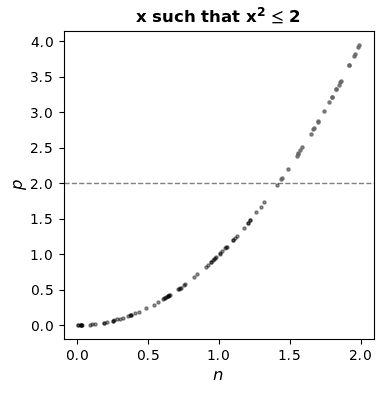

In [23]:
plt.figure(figsize=(4, 4))
# plt.grid(zorder=0)

plt.axhline(2, alpha=0.5, color="k", linestyle="--", linewidth=1)

# mask = ps < 0.5
        
plt.scatter(xs[count], ys[count], s=5, color=(0.0, 0.0, 0.0), marker='o', zorder=4, alpha= 0.4)
plt.scatter(xs[~count], ys[~count], s=5, color=(0.4, 0.4, 0.4), marker='o', zorder=4, alpha=0.8)
# plt.scatter(xs[~mask], ps[~mask], s=5, color="k", marker='o', zorder=4)
# plt.vlines(xs, ymax = (mask) * ps, ymin=np.zeros(mask.size), color='k', alpha = 0.2)
# plt.vlines(xs, ymax = (~mask) * ps, ymin=np.zeros((~mask).size), color='k', alpha = 0.8)

# plt.scatter(intersection[0], intersection[1], s=20, color='k', marker='o')

# plt.annotate(f"$p_{{{n}}} = {{{intersection[1]:.3f}}} $",(intersection[0] -12, intersection[1]+ 0.01), fontsize=12)
# plt.xticks(np.arange(0, 51, 5, dtype=int))
# plt.yticks(np.arange(0, 1.1, 0.1, dtype=float))
# plt.xlim(0, 50)
# plt.ylim(0, 1)
plt.title("$\\mathbf{ \\textbf{x such that } x^2 \le 2}$", fontsize=12)
plt.xlabel("$n$", fontsize=12)
plt.ylabel("$p$", fontsize=12)
plt.savefig("../drawings/p2_2.pdf")